<a href="https://colab.research.google.com/github/mohitkhannanu/udemy-tf-course/blob/master/Colab_3_Building_an_Artificial_Neural_Network_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

## Step 1: Installing dependencies and setting up a GPU environment

In [1]:
!pip install tensorflow-gpu==2.3.0

     |████████████████████████████████| 320.4MB 47kB/s 


## Step 2: Importing the libraries and the dataset

In [4]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [5]:
tf.__version__

'2.3.0'

## Step 3: Data Preprocessing



### Loading the dataset

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
from matplotlib import pyplot as plt

TypeError: ignored

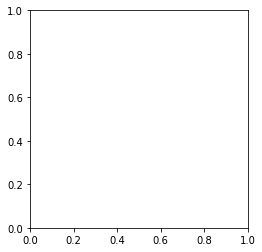

In [54]:
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))

### Normalizing the images

We divide each pixel of the image in the training and test sets by the maximum number of pixels (255).

In this way each pixel will be in the range [0, 1]. By normalizing images we make sure that our model (ANN) trains faster.

In [10]:
X_train = X_train / 255.0

In [11]:
X_test = X_test / 255.0

### Reshaping the dataset

Since we are building a fully connected network, we reshape the training set and the test set to be into the vector format.

In [12]:
# Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]
X_train = X_train.reshape(-1, 28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
# We reshape the test set the same way
X_test = X_test.reshape(-1, 28*28)

## Step 4: Building an Artificial Neural Network

### Defining the model

Simply define an object of the Sequential model.

In [18]:
model = tf.keras.models.Sequential()

### Adding a first fully-connected hidden layer

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

In [21]:
model.add(tf.keras.layers.Dense(units=128, activation = 'relu', input_shape=(784,)))

### Adding a second layer with Dropout

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. That way while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [27]:
model.add(tf.keras.layers.Dropout(0.2))

### Adding the output layer

- units: number of classes (10 in the Fashion MNIST dataset)
- activation: softmax

In [28]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

### Compiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [35]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5130 - sparse_categorical_accuracy: 0.8155
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3780 - sparse_categorical_accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3410 - sparse_categorical_accuracy: 0.8746
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3165 - sparse_categorical_accuracy: 0.8829
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2986 - sparse_categorical_accuracy: 0.8892


### Model evaluation and prediction

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3637 - sparse_categorical_accuracy: 0.8692


In [44]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8691999912261963


In [62]:
p = model.predict(X_test)

In [73]:
p = model.predict_classes(X_test)

In [88]:
p[100]

3

In [89]:
y_test[100]

3

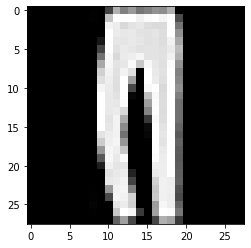

In [87]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.get_cmap('gray'))

In [99]:
np.savetxt("p.csv", p, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

In [101]:
import os as os
os.path.abspath(os.getcwd())

'/content'